# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
# En esta celda cargá el regresor y realizá el entrenamiento

dtregre = DecisionTreeRegressor() 
dtregre.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [6]:
# Acá realizá la predicción

y_pred = dtregre.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [7]:
# En esta celda calculá el rmse

np.sqrt(mean_squared_error(y_test, y_pred))

27515.683656525795

__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

In [8]:
rmses_train = []
rmses_test = []

In [9]:
for value in range (1,30,5):
    dtregre = DecisionTreeRegressor(max_depth = value)
    dtregre.fit(X_train, y_train)

    y_pred_train = dtregre.predict(X_train)

    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    

    y_pred_test = dtregre.predict(X_test)
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    
    print ('El valor RMSE en training es:', rmses_train)
    print ('El valor RMSE en testing es', rmses_test)

El valor RMSE en training es: [27147.24353912337]
El valor RMSE en testing es [26762.805881325974]
El valor RMSE en training es: [27147.24353912337, 18971.51708479838]
El valor RMSE en testing es [26762.805881325974, 22988.592510568044]
El valor RMSE en training es: [27147.24353912337, 18971.51708479838, 10205.100714294853]
El valor RMSE en testing es [26762.805881325974, 22988.592510568044, 25647.93412932124]
El valor RMSE en training es: [27147.24353912337, 18971.51708479838, 10205.100714294853, 3970.455457782483]
El valor RMSE en testing es [26762.805881325974, 22988.592510568044, 25647.93412932124, 27239.180182244356]
El valor RMSE en training es: [27147.24353912337, 18971.51708479838, 10205.100714294853, 3970.455457782483, 589.3483721796894]
El valor RMSE en testing es [26762.805881325974, 22988.592510568044, 25647.93412932124, 27239.180182244356, 27596.230481766237]
El valor RMSE en training es: [27147.24353912337, 18971.51708479838, 10205.100714294853, 3970.455457782483, 589.348

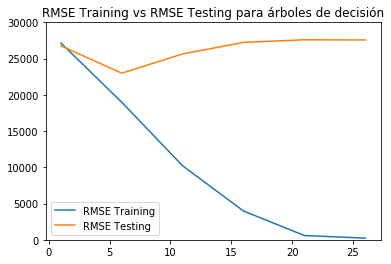

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [11]:
from sklearn.neighbors import KNeighborsRegressor

y_train = y_train.astype('int')
X_train = X_train.astype('int')

y_test = y_test.astype('int')
X_test = X_test.astype('int')

In [12]:
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [13]:
y_pred_regressor = neigh.predict(X_test)

In [14]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda

np.sqrt(mean_squared_error(y_test, y_pred_regressor))

25083.629466721588

__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [15]:
rmses_train = []
rmses_test = []

In [16]:
# Calculá los cambio en el rmse en esta celda

for n_neighbors in range (1,30,1):
    
    knnr = KNeighborsRegressor(n_neighbors)
    
    knnr.fit(X_train, y_train)
    y_pred_train = knnr.predict(X_train)
    
    y_pred_test = knnr.predict(X_test)
    
    
    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    
    
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    
   

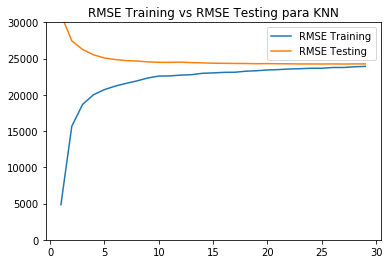

In [17]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [18]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [19]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [20]:
regressor_predict = regressor.predict(X_test)

In [21]:
# Calculá en esta celda los cross_val_score

from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)

print("Promedio: ",  np.sqrt(nmsq2rmse(score).mean()))

Promedio:  159.9600786246234


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [22]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [23]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [24]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,110000,100417.653,9582.347
1,99000,90115.821,8884.179
2,160000,131896.411,28103.589
3,135000,131896.411,3103.589
4,72000,90115.821,18115.821
5,145860,131896.411,13963.589
6,85000,100417.653,15417.653
7,130000,90115.821,39884.179
8,135000,131896.411,3103.589
9,115000,131896.411,16896.411
